In [4]:
import pandas as pd

In [1]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
#from __future__ import print_function
np.random.seed(1)
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import random
import dataframe_image as dfi
from PIL import Image
import os
import six
from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn

In [2]:
#Reading file provide SQL
def read_csv(name_df,path):
    name_df = pd.read_csv(path+".csv")
    return name_df

In [3]:
df_intial = read_csv('df', 'df5')

In [4]:
df = df_intial.copy()

In [7]:
type(df.size)


numpy.int64

In [10]:
df =df.drop_duplicates()
df

,Nome_Ocorrencia,Labels,ID,__de_saturacao_da_transferrina,ac__anti_t_cruzi__doen_a_de_chagas_,ac__anticardiolipina___iga__igg_e_igm__,acesso_p__hemodialise__conf__fistula_art__venosa_s_enxerto,acesso_para_hemodialise_com_implante_de_cateter_de_duplo_lumem_na_ira,acido_folico,acido_urico,...,urina_tipo_i,urocultura_,valvo_pulmonar,vancomicina,velocidade_de_hemossedimentacao___vhs__,ventilador,ventilador_respirador,verificacao_de_sinais_vitais_,vitamina_b12,western_blott_para_hiv
0,Miocardiopatia isquemica,374,1152470766391025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Taquicardia ventricular,373,6223164482365582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Hipertensao essencial (primaria),373,6223164482365582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bloqueio atrioventricular total,373,6223164482365582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Diabetes mellitus nao-insulino-dependente,373,6223164482365582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,Febre nao especificada,0,3597757495322061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10280,"Tuberculose pulmonar, sem mencao de confirmaca...",0,3597757495322061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10281,Complicacao mecanica de protese valvular cardiaca,0,7018064523761574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10282,Erisipela,0,7849351982050274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.350868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df = df.drop(columns =['ID','Nome_Ocorrencia'])


In [12]:
df.columns

Index(['Labels', '__de_saturacao_da_transferrina',
       'ac__anti_t_cruzi__doen_a_de_chagas_',
       'ac__anticardiolipina___iga__igg_e_igm__',
       'acesso_p__hemodialise__conf__fistula_art__venosa_s_enxerto',
       'acesso_para_hemodialise_com_implante_de_cateter_de_duplo_lumem_na_ira',
       'acido_folico', 'acido_urico', 'acido_urico___urina__amostra_isolada_',
       'acompanhante_sus',
       ...
       'urina_tipo_i', 'urocultura_', 'valvo_pulmonar', 'vancomicina',
       'velocidade_de_hemossedimentacao___vhs__', 'ventilador',
       'ventilador_respirador', 'verificacao_de_sinais_vitais_',
       'vitamina_b12', 'western_blott_para_hiv'],
      dtype='object', length=544)

In [13]:
df.Labels.mode()

0    5
dtype: int64

In [14]:
df['Labels'].value_counts()

5      960
7      480
45     274
332    231
23     223
      ... 
111      1
139      1
163      1
187      1
191      1
Name: Labels, Length: 375, dtype: int64

In [15]:
df

,Labels,__de_saturacao_da_transferrina,ac__anti_t_cruzi__doen_a_de_chagas_,ac__anticardiolipina___iga__igg_e_igm__,acesso_p__hemodialise__conf__fistula_art__venosa_s_enxerto,acesso_para_hemodialise_com_implante_de_cateter_de_duplo_lumem_na_ira,acido_folico,acido_urico,acido_urico___urina__amostra_isolada_,acompanhante_sus,...,urina_tipo_i,urocultura_,valvo_pulmonar,vancomicina,velocidade_de_hemossedimentacao___vhs__,ventilador,ventilador_respirador,verificacao_de_sinais_vitais_,vitamina_b12,western_blott_para_hiv
0,374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10280,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10281,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10282,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.350868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df

,Labels,__de_saturacao_da_transferrina,ac__anti_t_cruzi__doen_a_de_chagas_,ac__anticardiolipina___iga__igg_e_igm__,acesso_p__hemodialise__conf__fistula_art__venosa_s_enxerto,acesso_para_hemodialise_com_implante_de_cateter_de_duplo_lumem_na_ira,acido_folico,acido_urico,acido_urico___urina__amostra_isolada_,acompanhante_sus,...,urina_tipo_i,urocultura_,valvo_pulmonar,vancomicina,velocidade_de_hemossedimentacao___vhs__,ventilador,ventilador_respirador,verificacao_de_sinais_vitais_,vitamina_b12,western_blott_para_hiv
0,374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.220285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10280,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10281,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10282,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.350868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_new = df.query('Labels == 7 or Labels == 5')  

In [18]:
 
nunique = df_new.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df_new=df_new.drop(cols_to_drop, axis=1)
df_new

,Labels,__de_saturacao_da_transferrina,ac__anti_t_cruzi__doen_a_de_chagas_,ac__anticardiolipina___iga__igg_e_igm__,acesso_p__hemodialise__conf__fistula_art__venosa_s_enxerto,acesso_para_hemodialise_com_implante_de_cateter_de_duplo_lumem_na_ira,acido_folico,acido_urico,acompanhante_sus,administra__o_de_alimenta__o_enteral__frasco,...,ureia___soro,ureia___urina,urina_tipo_i,urocultura_,vancomicina,velocidade_de_hemossedimentacao___vhs__,ventilador,ventilador_respirador,verificacao_de_sinais_vitais_,vitamina_b12
6514,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
6515,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
6516,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
6517,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
6518,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10206,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0
10209,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0
10210,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0
10211,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0


In [19]:
df_new

,Labels,__de_saturacao_da_transferrina,ac__anti_t_cruzi__doen_a_de_chagas_,ac__anticardiolipina___iga__igg_e_igm__,acesso_p__hemodialise__conf__fistula_art__venosa_s_enxerto,acesso_para_hemodialise_com_implante_de_cateter_de_duplo_lumem_na_ira,acido_folico,acido_urico,acompanhante_sus,administra__o_de_alimenta__o_enteral__frasco,...,ureia___soro,ureia___urina,urina_tipo_i,urocultura_,vancomicina,velocidade_de_hemossedimentacao___vhs__,ventilador,ventilador_respirador,verificacao_de_sinais_vitais_,vitamina_b12
6514,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
6515,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
6516,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
6517,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
6518,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10206,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0
10209,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0
10210,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0
10211,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0


In [20]:
df_new =df_new.reset_index()


In [21]:
df_new

,index,Labels,__de_saturacao_da_transferrina,ac__anti_t_cruzi__doen_a_de_chagas_,ac__anticardiolipina___iga__igg_e_igm__,acesso_p__hemodialise__conf__fistula_art__venosa_s_enxerto,acesso_para_hemodialise_com_implante_de_cateter_de_duplo_lumem_na_ira,acido_folico,acido_urico,acompanhante_sus,...,ureia___soro,ureia___urina,urina_tipo_i,urocultura_,vancomicina,velocidade_de_hemossedimentacao___vhs__,ventilador,ventilador_respirador,verificacao_de_sinais_vitais_,vitamina_b12
0,6514,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
1,6515,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
2,6516,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
3,6517,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
4,6518,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,10206,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0
1436,10209,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0
1437,10210,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0
1438,10211,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0


In [22]:
df_new = df_new.drop(columns =['index'])

In [23]:
df_new

,Labels,__de_saturacao_da_transferrina,ac__anti_t_cruzi__doen_a_de_chagas_,ac__anticardiolipina___iga__igg_e_igm__,acesso_p__hemodialise__conf__fistula_art__venosa_s_enxerto,acesso_para_hemodialise_com_implante_de_cateter_de_duplo_lumem_na_ira,acido_folico,acido_urico,acompanhante_sus,administra__o_de_alimenta__o_enteral__frasco,...,ureia___soro,ureia___urina,urina_tipo_i,urocultura_,vancomicina,velocidade_de_hemossedimentacao___vhs__,ventilador,ventilador_respirador,verificacao_de_sinais_vitais_,vitamina_b12
0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084585,0.0,0.015389,0.021378,0.025275,0.0,0.01496,0.009188,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0
1436,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0
1437,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0
1438,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0


In [24]:
df_new = df_new.rename(columns = {'Labels': 'target'}, inplace = False)

In [25]:
labels = df_new['target'].to_numpy()

In [26]:
df_new_wot = df_new
name_att = list(df_new_wot.columns)
len(name_att)

322

In [27]:
df_new_wot = df_new_wot.drop(columns =['target'])

In [28]:
data =df_new_wot.to_numpy()

In [29]:
name_att = list(df_new_wot.columns)

In [30]:
class_name = ['0','1']

In [4]:
# OS LABELS do Grupo 5 foram trocados pelo 0 
# OS LABLES do Grupo 7 foraam trocados pelo 1

#----G- 5      960   elementos nos grupo
#----G-7      480   elementos nos grupo

In [31]:
for i in range(len(labels)):
    if labels[i] == 5:
        labels[i] = 0
    if labels[i] == 7:
        labels[i] =1

In [32]:
#print(labels)

[1 1 1 ... 0 0 0]


In [33]:
labels.shape

(1440,)

In [34]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
#from __future__ import print_function
np.random.seed(1)
import pandas as pd
import random

In [35]:
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(data, labels, train_size=0.7)

In [36]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train, labels_train)

RandomForestClassifier(n_estimators=500)

In [37]:
train.shape

(1007, 321)

In [38]:
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=name_att, class_names=class_name, discretize_continuous=True)

## rf.fit(train, labels_train)

In [39]:
sklearn.metrics.accuracy_score(labels_test, rf.predict(test))

1.0

In [40]:
rf.predict(test) == labels_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [41]:
labels_test

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [42]:
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=name_att, class_names=class_name, discretize_continuous=True)

In [43]:
#exp = explainer.explain_instance(test[1], rf.predict_proba, num_features=543, top_labels=1)
#exp.show_in_notebook(show_table=True, show_all=False)

In [44]:
def personalize_color_pie(names_columns):
    import matplotlib
    list_color = []
    for name, hex in matplotlib.colors.cnames.items():
        #print(name, hex)
        list_color.append(name)

    col = random.sample(list_color, len(names_columns))
    dic_col = dict(zip(names_columns,col))
    return dic_col

In [60]:
def get_values_lime(names_attributes,num_att):
    from datetime import datetime


    var_names = names_attributes
    features_id = names_attributes
    features_id.insert(0,"target")
    df = pd.DataFrame(columns=features_id)
    
    size_test = int(len(test))
    #print(len(test))
    #size_feature = int(len(names_attributes)) +2
    #size_feature = 321
    size_feature = num_att
    #print(size_feature)
    #size_test
    
    for i in range(0,size_test):
        linha = i
        exp = explainer.explain_instance(test[i], rf.predict_proba, num_features=num_att, top_labels=1)
        lista_a =exp.available_labels()
        data_e_hora_atuais = datetime.now()
        data_e_hora_em_texto = data_e_hora_atuais.strftime("%d/%m/%Y %H:%M")
        print("LINHA NUMERO", i, " de ", size_test,data_e_hora_em_texto)
        target = lista_a[0]
        #print(target)
    
        for feat_num in range(0,size_feature):
            names_attributes
            lista_value= exp.as_list(target)
            print("+++++++++++++++++++")
           
            feature_na_linha = lista_value[feat_num]
            print(feat_num)
            name_d_fea = feature_na_linha[0]
            valor_feat = feature_na_linha[1]

            for name in var_names:
                if name in name_d_fea:
                    df.loc[linha,'target'] = target
                    df.loc[linha,name] = valor_feat
    return df

In [46]:
def do_boxPlot(df,tittle,add_to_save):
    df.plot.box(figsize=(25,10))
    plt.title(tittle)
    plt.savefig(add_to_save) 
    plt.close()               

In [47]:
def transf_value_df_asfloat(df,list_var_names):
    for var in list_var_names:
        df[var] = df[var].astype(float)
        
    return df

In [48]:
def replace_negative_number_zero(df):
    num = df._get_numeric_data()
    num[num < 0] = 0
    
    return df

In [49]:
def check_class(linha_exemplo,df):
    class_number = int(df.iloc[linha_exemplo]['target'])
    
    return class_number

In [93]:
def get_concat_v_blank(im1, im2,im3, color=(255, 255, 255)):
    dst = Image.new('RGB', (max(im1.width, im2.width,im3.width), im1.height + im2.height+im3.height), color)
    dst.paste(im1, (0, 0))
    dst.paste(im3, (500, im1.height))
    dst.paste(im2, (0, im1.height))
    #dst.paste(im3, (350, 700))
   
    return dst



In [51]:
def sort_df_qnt_att (df, qnt_att):
    #print(df)
    
    delete = list(df.columns)
    tar = "target"
    matches = [match for match in delete if "target" in match]
    #valor_target= float(df.target)
    #print(matches)
    df=df.drop(matches, axis=1)
    
  #------------Separando dataframe
            #ordenando    
    
    #print(df)
    df= df.T
    size_df = int(df.size)
    df = df.sort_values(by=0,ascending = False)
  
    
    
    df_att_p = df.head(qnt_att) 
    
    df_att_u = df.tail(size_df-qnt_att)
    
    #print(df_attr_u)
    
    
    print(df_att_u.sum())
    print(df_att_p.sum())
    sum_att_values = float(df_att_u.sum())
    
    #adicionando uma nova coluna - Com o valores de todos 
    
    
    
    df_att_p = df_att_p.T
    df_att_p['Outras ocorrências'] = sum_att_values
    #df_att_p['target'] = valor_target
    
    return df_att_p

    #print(df.sum(axis = 0, skipna = True) )
    
    

In [52]:
def save_all_plots (df,target_attribute,num_att):
    from matplotlib import pyplot as plt
    df_pos1 = sort_df_qnt_att(df,num_att)
    #df_pos1 = df_pos1.drop(columns ='target')
    

    num_row = int(len(df.index))
    df_aux = df.copy()
    df = df.drop(columns =target_attribute)
    
    
    
    #dic_colors = personalize_color_pie(df.columns)
    for i in range(0,num_row):
        number_class = check_class(i,df_aux)
        df_pos1 = df_pos1.loc[i].dropna()
        df_pos1.plot.bar(rot=0,  fontsize=10, legend = 3,figsize=(20, 10))
        plt.title('Example row' + str(i) +"BAR Local Class "+ str(number_class))
        name_file = 'Example row' + str(i) +"BAR Local Class "+ str(number_class) + '.png'
        plt.savefig('Figure_all_examples_local/'+name_file)
        plt.close()
        
        #call colors 
        
        
        from sklearn import preprocessing
        
        
        #plot_local = df_pos.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%', legend = 1,normalize= True,colors=[dic_colors.get(x) for x in df.columns])
        #plot_local = df_pos1[0].plot.pie(subplots= True, figsize=(20, 10),autopct='%1.1f%%', legend = 1)
        plot_local = df_pos1.plot.pie(subplots= True, figsize=(20, 10),autopct='%1.1f%%', legend = 1)

        plt.title('Example row ' + str(i) +"PieCHART Local Class  "+ str(number_class))
        name_file_p = 'Example row ' + str(i) +"PieCHART Local Class "+ str(number_class) + '.png'
        plt.savefig('Figure_all_examples_local/'+name_file_p)
        plt.close()
        
        
        
        #print(type(df.loc[i]))
        
        name_file_df = 'DFrow' + str(i) + '.png'
        image_df = pd.DataFrame({'Nome Variavel':df_pos1.index, 'Valores':df_pos1.values})
        image_df=image_df.sort_values(by=['Valores'],ascending=False)
        image_df=image_df.reset_index(drop=True)
        
        #image_df= image_df.insert(1, "value")
        #print(image_df)
        #image_df = df.loc[i].transpose()
        #print(image_df)
       
        
        ax = render_mpl_table(image_df, header_columns=0, col_width=4.0)
        #fig.savefig('Figure_all_examples_local/'+name_file_df)
        type(ax)
        plt.savefig('Figure_all_examples_local/'+name_file_df)
        plt.close()

        
       # dfi.export(image_df,"Figure_all_examples_local/"+name_file_df)
        
        #save_df_as_image(image_df, 'Figure_all_examples_local/'+name_file_df)

        im1 = Image.open('Figure_all_examples_local/'+name_file)
        im2 = Image.open('Figure_all_examples_local/'+name_file_df)
        im3 = Image.open('Figure_all_examples_local/'+name_file_p)
        
        get_concat_v_blank(im1, im2,im3, (255, 255, 255)).save('Figure_all_examples_local/----general_imageRow'+str(i)+".png")
        os.remove('Figure_all_examples_local/'+name_file_p)
        os.remove('Figure_all_examples_local/'+name_file_df)
        os.remove('Figure_all_examples_local/'+name_file)
        
        

In [53]:
def render_mpl_table(data, col_width=8.0, row_height=0.9, font_size=13,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax


In [54]:
def div_daframe_per_class(df_general, target_attribute,df_initial,num_att):
    
    list_class = df_general[target_attribute].unique()
    #print("******-------****  Ordem lista de classe")
    #print(list_class)
    number_class = int(len(list_class))
    df_aux = df_initial.copy()
    df_no_target = df_aux.copy()
    df_no_target = df_no_target.drop(columns =target_attribute)
        
    
    #dic_colors = personalize_color_pie(df_no_target.columns)
    
    for i in range(0,number_class):
        df_initial = df_aux
        string_name_class = "df_class"+str(list_class[i])
        string_name_class = pd.DataFrame()
        string_name_class = df_general[df_general.target==list_class[i]]
        
        string_name_class = string_name_class.drop(columns = target_attribute)
        df_initial = df_initial.drop(columns =target_attribute)
        #print(df_initial)
        #break
        
        # Make global values por meio da ordenação do values media e ordenação
            #make normalize before ordene attributte
            
        string_name_class = normalize_df(string_name_class)
        
        #order and create a new df to plot reults
        string_aux = "c"+str((list_class[i]))
        string_aux = string_name_class.mean(axis = 0).sort_values(ascending=False)
        
        string_aux = string_aux.to_frame()
        string_aux = string_aux.T
        string_aux = sort_df_qnt_att(string_aux,num_att)
        
        string_aux = string_aux.iloc[0]
        
               

        
        
        
    
        #string_aux = sort_df_qnt_att(string_aux,num_att)
        #string_aux = string_aux.head(num_att)
        #print("############### numero att", num_att)
       
      
        
        
        
        
        
        
        string_df = pd.DataFrame(string_aux).transpose()
        #({'Nome Variavel':df_pos.index, 'Valores':df_pos.values})
        tt = pd.DataFrame({'Nome Variavel':string_aux.index, 'Valores':string_aux.values})
        name_col = list(tt['Nome Variavel'].values)
        #print(name_col)
        name_col.remove('Outras ocorrências')

        #name_col.append("Outras ocorrências")
        plotdf = df_initial[name_col]
        #print(plotdf)
        
        #Plot Bar Chart
        #plt.close()
        string_df.plot.bar(rot=0,  fontsize=10, legend = 3,figsize=(10, 8) )
        plt.title('BAR Global Class'+str(list_class[i]))
        name_b= 'BAR_CLass'+ str(list_class[i])+'.png'
        plt.savefig('Figures_Global_Class/'+ name_b)
        plt.close()
        
        #Plot Pie Chart
       
        #plot_global = string_df.loc[0].plot.pie(subplots=True, figsize=(15, 10),autopct='%1.1f%%', legend = 1,normalize= True,colors=[dic_colors.get(x) for x in string_df.columns])
        plot_global = string_df.loc[0].plot.pie(subplots=True, figsize=(15, 10),autopct='%1.1f%%', legend = 1)
        plt.title('Pie Chart Global Class '+ str(list_class[i]))
        name_pC = 'PieChart_Global Class  '+ str(list_class[i]) +'.png' 
        plt.savefig('Figures_Global_Class/'+ name_pC) 
        plt.close()
        
        
        #Plot Box Plot Global 
        
        
        plotdf.plot.box(figsize=(25,10))
        plt.title('Box Plot Global Class' + str(list_class[i]) )
        name_boxP = 'BoxPlot_class_'+ str(list_class[i])+'.png'
        plt.savefig('Figures_Global_Class/'+name_boxP)
        plt.close()
        
        
        image_df = tt
        
        
        
        #join figures 
        
        name_sv_df= "df"+str(list_class[i])+".png"

        ax = render_mpl_table(image_df, header_columns=0, col_width=4.0)
        #fig.savefig('Figure_all_examples_local/'+name_file_df)
        plt.savefig("Figures_Global_Class/"+name_sv_df)
        #dfi.export(image_df,"Figures_Global_Class/"+name_sv_df)
        plt.close()
        
        
        
        im1 = Image.open('Figures_Global_Class/'+name_b)
        im2 = Image.open('Figures_Global_Class/'+name_sv_df)
        im3 = Image.open('Figures_Global_Class/'+name_pC)
        
        
        get_concat_v_blank(im3, im2,im1, (255, 255, 255)).save('Figures_Global_Class/----general_imageRow'+str(list_class[i])+".png")

        os.remove('Figures_Global_Class/'+name_sv_df)
        os.remove('Figures_Global_Class/'+name_b)
        os.remove('Figures_Global_Class/'+name_pC)

In [15]:
def normalize_df(df_no_target):
    df_no_target =df_no_target.div(df_no_target.sum(axis=1), axis=0)
    df_no_target.mul(100)
    
    return df_no_target   

In [52]:
len(name_att)

321

Lembrar de desmarcar essa função

In [1]:
#Essa função é utilizada para extrair os valores do LIME. 
    #Passando como parametreo o nome dos atributos e a quantidade de atributos que devem retornar os valores
    #_- Ela retorna um dataframe com os pesos de TODAS váriaveis para a classificação e a classe na qual foi Classificada
    #- 
df_initial = get_values_lime(name_att,321)

NameError: name 'get_values_lime' is not defined

In [ ]:
#Escrevendo o df_FINAL em um arquivo

In [62]:
df_initial.to_csv('final_ALL.csv', index=False)

In [ ]:
# A partir daqui que leio o Arquivo já gerado pelas possibilidades e tem o meu método e a preparação e plotagem dos gráficos 

In [16]:

df_initial =read_csv('df_initial', 'soplotarALL')


In [17]:
#Transformação de todos os atributos para o Tipo FLOAT
df_initial = transf_value_df_asfloat(df_initial,df_initial.columns)

In [18]:
#Trocando todos os valores NEGATIVOS por 0 
df_complete = replace_negative_number_zero(df_initial)

In [60]:
#Função para observar Linha por Linha e gerando uma imagem para cada
 #Parametro dataframe com todas linhas e pesos, o nome da váriavel alvo e a QUantidade dos Atributos a serem COnsiderados na plotagem
save_all_plots(df_complete,'target',10)

   target  target.1  __de_saturacao_da_transferrina  \
0     0.0       0.0                        0.000931   

   ac__anti_t_cruzi__doen_a_de_chagas_  \
0                             0.001072   

   ac__anticardiolipina___iga__igg_e_igm__  \
0                                      0.0   

   acesso_p__hemodialise__conf__fistula_art__venosa_s_enxerto  \
0                                                0.0            

   acesso_para_hemodialise_com_implante_de_cateter_de_duplo_lumem_na_ira  \
0                                           0.008166                       

   acido_folico  acido_urico  acompanhante_sus  ...  ureia___soro  \
0      0.001466      0.00449          0.004934  ...      0.042545   

   ureia___urina  urina_tipo_i  urocultura_  vancomicina  \
0       0.004462      0.007445     0.000552     0.000525   

   velocidade_de_hemossedimentacao___vhs__  ventilador  ventilador_respirador  \
0                                      0.0    0.001874               0.001874   

   v

In [71]:
#Esta função é para observação GLOBAL do métodos separando por CLASSE a CLASSE
# Novamente tem o dataframe como entrada o nome da variavel target e a quantidade de atributos que devem serem retornados
div_daframe_per_class(df_complete,'target',df_initial,5)

   potassio___soro  lactato__lab__centro_cirurgico_  sodio___soro  \
0         0.058445                         0.046419      0.041382   

   calcio_ionizado  hematocrito  contagem_de_plaquetas  \
0         0.037744      0.03768               0.028297   

   hemograma_completo___contagem_de_plaquetas  ureia___soro  \
0                                    0.028297      0.024158   

   emergency_room_visit  creatinina___soro  ...  ultrassom_de_abdomen_total  \
0              0.022908           0.022058  ...                         0.0   

   fator_reumatoide  gasometria_ventriculo_esquerdo__ve_  \
0               0.0                                  0.0   

   verificacao_de_sinais_vitais_  ultrassom_de_parede_abdominal  ferritina  \
0                            0.0                            0.0        0.0   

   fenobarbital  fenitoina  fechamento_de_civ__soe  target.1  
0           0.0        0.0                     0.0       0.0  

[1 rows x 322 columns]
0    0.77833
dtype: float64
0 

In [82]:
df_complete

,target,__de_saturacao_da_transferrina,ac__anti_t_cruzi__doen_a_de_chagas_,ac__anticardiolipina___iga__igg_e_igm__,acesso_p__hemodialise__conf__fistula_art__venosa_s_enxerto,acesso_para_hemodialise_com_implante_de_cateter_de_duplo_lumem_na_ira,acido_folico,acido_urico,acompanhante_sus,administra__o_de_alimenta__o_enteral__frasco,...,ureia___soro,ureia___urina,urina_tipo_i,urocultura_,vancomicina,velocidade_de_hemossedimentacao___vhs__,ventilador,ventilador_respirador,verificacao_de_sinais_vitais_,vitamina_b12
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_initial.iloc[0].unique()

array([0.        ,        nan, 0.06527031, 0.06694737, 0.07936918,
       0.1055939 , 0.07516871])

In [ ]:
df_initial.to_

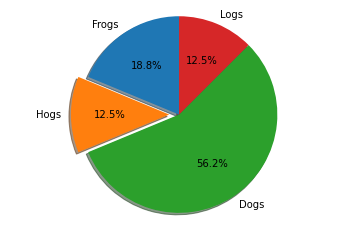

In [10]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 10, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



In [160]:
# -*- coding: utf-8 -*-
"""pre-proc.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1780oLMY8310hjNGZIoXVczwd8uC1AwYt
"""

import pandas as pd
import sys 

import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
#from __future__ import print_function
np.random.seed(1)
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import random
import dataframe_image as dfi
from PIL import Image
import os
import six
from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn

#Reading file provide SQL
def read_csv(name_df,path):
    name_df = pd.read_csv(path+".csv")
    return name_df

df_intial = read_csv('df', 'df5')

df = df_intial.copy()



df =df.drop_duplicates()


df = df.drop(columns =['ID','Nome_Ocorrencia'])

df.columns

df.Labels.mode()

df['Labels'].value_counts()

#-df











df_new = df.query('Labels == 7 or Labels == 5')

nunique = df_new.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df_new=df_new.drop(cols_to_drop, axis=1)
df_new

#-df_new

df_new =df_new.reset_index()

#-df_new

df_new = df_new.drop(columns =['index'])

#-df_new

df_new = df_new.rename(columns = {'Labels': 'target'}, inplace = False)

labels = df_new['target'].to_numpy()



df_new_wot = df_new
name_att = list(df_new_wot.columns)
#-len(name_att)

#-df_new_wot = df_new_wot.drop(columns =['target'])

#-data =df_new_wot.to_numpy()

#-name_att = list(df_new_wot.columns)

#-class_name = ['0','1']

# OS LABELS do Grupo 5 foram trocados pelo 0 
# OS LABLES do Grupo 7 foraam trocados pelo 1

#----G- 5      960   elementos nos grupo
#----G-7      480   elementos nos grupo

#-for i in range(len(labels)):
    #-if labels[i] == 5:
        #-labels[i] = 0
    #-if labels[i] == 7:
        #-labels[i] =1

#-print(labels)

#-labels.shape

import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
#from __future__ import print_function
np.random.seed(1)
import pandas as pd
import random

#-train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(data, labels, train_size=0.7)



#-rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
#-rf.fit(train, labels_train)

#-train.shape

#-explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=name_att, class_names=class_name, discretize_continuous=True)

"""## rf.fit(train, labels_train)"""

#-sklearn.metrics.accuracy_score(labels_test, rf.predict(test))

#-rf.predict(test) == labels_test



#-labels_test

#-explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=name_att, class_names=class_name, discretize_continuous=True)

#exp = explainer.explain_instance(test[1], rf.predict_proba, num_features=543, top_labels=1)
#exp.show_in_notebook(show_table=True, show_all=False)





def personalize_color_pie(names_columns):
    import matplotlib
    list_color = []
    for name, hex in matplotlib.colors.cnames.items():
        #print(name, hex)
        list_color.append(name)

    col = random.sample(list_color, len(names_columns))
    dic_col = dict(zip(names_columns,col))
    return dic_col

def get_values_lime(names_attributes,num_att):
    from datetime import datetime


    var_names = names_attributes
    features_id = names_attributes
    features_id.insert(0,"target")
    df = pd.DataFrame(columns=features_id)
    
    size_test = int(len(test))
    #print(len(test))
    #size_feature = int(len(names_attributes)) +2
    #size_feature = 321
    size_feature = num_att
    #print(size_feature)
    #size_test
    
    for i in range(0,size_test):
        linha = i
        exp = explainer.explain_instance(test[i], rf.predict_proba, num_features=num_att, top_labels=1)
        lista_a =exp.available_labels()
        data_e_hora_atuais = datetime.now()
        data_e_hora_em_texto = data_e_hora_atuais.strftime("%d/%m/%Y %H:%M")
        print("LINHA NUMERO", i, " de ", size_test,data_e_hora_em_texto)
        target = lista_a[0]
        #print(target)
    
        for feat_num in range(0,size_feature):
            names_attributes
            lista_value= exp.as_list(target)
            print("+++++++++++++++++++")
           
            feature_na_linha = lista_value[feat_num]
            print(feat_num)
            name_d_fea = feature_na_linha[0]
            valor_feat = feature_na_linha[1]

            for name in var_names:
                if name in name_d_fea:
                    df.loc[linha,'target'] = target
                    df.loc[linha,name] = valor_feat
    return df

def do_boxPlot(df,tittle,add_to_save):
    df.plot.box(figsize=(25,10))
    plt.title(tittle)
    plt.savefig(add_to_save) 
    plt.close()

def transf_value_df_asfloat(df,list_var_names):
    for var in list_var_names:
        df[var] = df[var].astype(float)
        
    return df

def replace_negative_number_zero(df):
    num = df._get_numeric_data()
    num[num < 0] = 0
    
    return df

def check_class(linha_exemplo,df):
    class_number = int(df.iloc[linha_exemplo]['target'])
    
    return class_number

def get_concat_v_blank(im1, im2,im3, color=(255, 255, 255)):
    dst = Image.new('RGB', (max(im1.width, im2.width,im3.width), im1.height + im2.height+im3.height), color)
    dst.paste(im1, (0, 0))
    dst.paste(im3, (500, im1.height))
    dst.paste(im2, (0, im1.height))
    #dst.paste(im3, (350, 700))
   
    return dst

def del_target (df):
    #print(df)
    
    delete = list(df.columns)
    tar = "target"
    matches = [match for match in delete if "target" in match]
    #valor_target= float(df.target)
    #print(matches)
    df=df.drop(matches, axis=1)
    
    
    return df

def sort_df_qnt_att (df, qnt_att):
    #print(df)
    
    delete = list(df.columns)
    tar = "target"
    matches = [match for match in delete if "target" in match]
    #valor_target= float(df.target)
    #print(matches)
    df=df.drop(matches, axis=1)
    
  #------------Separando dataframe
            #ordenando    
    
    #print(df)
    df= df.T
    size_df = int(df.size)
    #print(df)
    
    #print(df)
    #df =df.sort_values(by=0,ascending = False)
    #df = df.sort_index(axis=1)
    
    namec = list(df.columns)
    print(list(df.columns) )
    df =df.sort_values(by=namec[0],ascending = False)
      
    
    df_att_p = df.head(qnt_att) 
    
    df_att_u = df.tail(size_df-qnt_att)
    
    #print(df_attr_u)
    
    
    #print(df_att_u.sum())
    #print(df_att_p.sum())
    sum_att_values = df_att_u.sum()
    #print(sum_att_values)
    
    #adicionando uma nova coluna - Com o valores de todos 
    
    
    
    df_att_p = df_att_p.T
    df_att_p['Outras ocorrências'] = sum_att_values
    #df_att_p['target'] = valor_target
    
    print("Este abaixo")
    print(df_att_p)
    
    return df_att_p

    #print(df.sum(axis = 0, skipna = True) )

def save_all_plots (df,target_attribute,num_att):
    from matplotlib import pyplot as plt
    #df_pos1 = sort_df_qnt_att(df,num_att,)
    
    #print(df)
    
    #df_pos1 = df_pos1.drop(columns ='target')
    

    num_row = int(len(df.index))
    df_aux = df.copy()
    df = df.drop(columns =target_attribute)
    #print("-----------------------------------------------------------------------",num_row)
    
    
    
    #dic_colors = personalize_color_pie(df.columns)
    #print(num_row)
    
    for i in range(0,num_row):
        

        df_pos1 = sort_df_qnt_att(df.iloc[[i]],num_att)
        
        number_class = check_class(i,df_aux)
        
        #df_pos1 = df_pos1.loc[i].dropna()
        df_pos1.iloc[0].plot.bar(rot=0,  fontsize=10, legend = 3,figsize=(20, 10))
        plt.title('Example row' + str(i) +"BAR Local Class "+ str(number_class))
        name_file = 'Example row' + str(i) +"BAR Local Class "+ str(number_class) + '.png'
        plt.savefig('Figure_all_examples_local/'+name_file)
        plt.close()
        
        #call colors 
        
        
        from sklearn import preprocessing
        
        
        #plot_local = df_pos.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%', legend = 1,normalize= True,colors=[dic_colors.get(x) for x in df.columns])
        #plot_local = df_pos1[0].plot.pie(subplots= True, figsize=(20, 10),autopct='%1.1f%%', legend = 1)
        plot_local = df_pos1.iloc[0].plot.pie(subplots= True, figsize=(20, 10),autopct='%1.1f%%', legend = 1)

        plt.title('Example row ' + str(i) +"PieCHART Local Class  "+ str(number_class))
        name_file_p = 'Example row ' + str(i) +"PieCHART Local Class "+ str(number_class) + '.png'
        plt.savefig('Figure_all_examples_local/'+name_file_p)
        plt.close()
        
        
        
        #print(type(df.loc[i]))
        
        name_file_df = 'DFrow' + str(i) + '.png'
        
        print("8888888888888888888888888888888888888888888888888888888888888888888888888888888888")
        #df_pos1 = df_pos1.T
        df_pos1=df_pos1.iloc[0]
        #print(type(df_pos1))
        df_pos1 = pd.DataFrame({'Nome variavel':df_pos1.index, 'Valores':df_pos1.values})
        df_pos1= df_pos1.sort_values(by=['Valores'],ascending=False)
        #print(df_pos1)

        
        
        
        
        #00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000#
        #break
        #print(list(df_pos1.index))
        #lista_v =[]
        #print("*************************************")
        #print(df_pos1)
       
        #print(type(df_pos1))
        #print("*************************************")
        #print(df_pos1.values[1])
        
        #for i in range(0, num_att+1):
            #lista_v.append(df_pos1.values[0][i])
        
        #print(lista_v)
        #break
        #lista_v = list(df_pos1[0].values)
       
            
        #print(lista_v)
        
        
        #image_df = pd.DataFrame({'Nome Variavel':df_pos1.index, 'Valores':df_pos1[0].values})
        #image_df=image_df.sort_values(by=['Valores'],ascending=False)
        image_df=df_pos1
        #-------------------------------------------------------------------------------------------------------------------#
        
        
        
        
        #image_df= image_df.insert(1, "value")
        #print(image_df)
        
        #image_df = df.loc[i].transpose()
        #print(image_df)
       
        
        ax = render_mpl_table(image_df, header_columns=0, col_width=4.0)
        #fig.savefig('Figure_all_examples_local/'+name_file_df)
        type(ax)
        plt.savefig('Figure_all_examples_local/'+name_file_df)
        plt.close()

        
       # dfi.export(image_df,"Figure_all_examples_local/"+name_file_df)
        
        #save_df_as_image(image_df, 'Figure_all_examples_local/'+name_file_df)

        im1 = Image.open('Figure_all_examples_local/'+name_file)
        im2 = Image.open('Figure_all_examples_local/'+name_file_df)
        im3 = Image.open('Figure_all_examples_local/'+name_file_p)
        
        get_concat_v_blank(im1, im2,im3, (255, 255, 255)).save('Figure_all_examples_local/----general_imageRow'+str(i)+".png")
        os.remove('Figure_all_examples_local/'+name_file_p)
        os.remove('Figure_all_examples_local/'+name_file_df)
        os.remove('Figure_all_examples_local/'+name_file)
        

def render_mpl_table(data, col_width=8.0, row_height=0.9, font_size=13,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

def div_daframe_per_class(df_general, target_attribute,df_initial,num_att):
    
    list_class = df_general[target_attribute].unique()
    #print("******-------****  Ordem lista de classe")
    #print(list_class)
    number_class = int(len(list_class))
    df_aux = df_initial.copy()
    df_no_target = df_aux.copy()
    df_no_target = df_no_target.drop(columns =target_attribute)
        
    
    #dic_colors = personalize_color_pie(df_no_target.columns)
    
    for i in range(0,number_class):
        df_initial = df_aux
        string_name_class = "df_class"+str(list_class[i])
        string_name_class = pd.DataFrame()
        string_name_class = df_general[df_general.target==list_class[i]]
        #print(string_name_class)
        
        string_name_class = string_name_class.drop(columns = target_attribute)
        df_initial = df_initial.drop(columns =target_attribute)
        print("+++++++++++++++++++++++++++++AQUI")
        #print(df_initial)
        
        #print(df_initial)
        #break
        
        # Make global values por meio da ordenação do values media e ordenação
            #make normalize before ordene attributte
        string_name_class = del_target(string_name_class)    
        string_name_class = normalize_df(string_name_class)
        #string_name_class = del_target(string_name_class)
        print(string_name_class)
        
        #print(string_name_class)
        #break
        #order and create a new df to plot reults
        string_aux = "c"+str((list_class[i]))
        #print(string_aux)
        
         
        string_aux = string_name_class.mean(axis = 0).sort_values(ascending=False)
        
        string_aux = string_aux.to_frame()
        string_aux = string_aux.T
        string_aux = sort_df_qnt_att(string_aux,num_att)
        #print(string_aux)
        
        string_aux = string_aux.iloc[0]
        
               

        
        
        
    
        #string_aux = sort_df_qnt_att(string_aux,num_att)
        #string_aux = string_aux.head(num_att)
        #print("############### numero att", num_att)
       
      
        
        
        
        
        
        
        string_df = pd.DataFrame(string_aux).transpose()
        #({'Nome Variavel':df_pos.index, 'Valores':df_pos.values})
        tt = pd.DataFrame({'Nome Variavel':string_aux.index, 'Valores':string_aux.values})
        name_col = list(tt['Nome Variavel'].values)
        #print(name_col)
        name_col.remove('Outras ocorrências')

        #name_col.append("Outras ocorrências")
        plotdf = df_initial[name_col]
        #print(plotdf)
        
        #Plot Bar Chart
        #plt.close()
        string_df.plot.bar(rot=0,  fontsize=10, legend = 3,figsize=(10, 8) )
        plt.title('BAR Global Class'+str(list_class[i]))
        name_b= 'BAR_CLass'+ str(list_class[i])+'.png'
        plt.savefig('Figures_Global_Class/'+ name_b)
        plt.close()
        
        #Plot Pie Chart
        print(string_df)
        #plot_global = string_df.loc[0].plot.pie(subplots=True, figsize=(15, 10),autopct='%1.1f%%', legend = 1,normalize= True,colors=[dic_colors.get(x) for x in string_df.columns])
        plot_global = string_df.loc[0].plot.pie(subplots=True, figsize=(15, 10),autopct='%1.1f%%', legend = 1)
        plt.title('Pie Chart Global Class '+ str(list_class[i]))
        name_pC = 'PieChart_Global Class  '+ str(list_class[i]) +'.png' 
        plt.savefig('Figures_Global_Class/'+ name_pC) 
        plt.close()
        
        
        #Plot Box Plot Global 
        
        
        plotdf.plot.box(figsize=(25,10))
        plt.title('Box Plot Global Class' + str(list_class[i]) )
        name_boxP = 'BoxPlot_class_'+ str(list_class[i])+'.png'
        plt.savefig('Figures_Global_Class/'+name_boxP)
        plt.close()
        
        
        image_df = tt
        
        
        
        #join figures 
        
        name_sv_df= "df"+str(list_class[i])+".png"

        ax = render_mpl_table(image_df, header_columns=0, col_width=4.0)
        #fig.savefig('Figure_all_examples_local/'+name_file_df)
        plt.savefig("Figures_Global_Class/"+name_sv_df)
        #dfi.export(image_df,"Figures_Global_Class/"+name_sv_df)
        plt.close()
        
        
        
        im1 = Image.open('Figures_Global_Class/'+name_b)
        im2 = Image.open('Figures_Global_Class/'+name_sv_df)
        im3 = Image.open('Figures_Global_Class/'+name_pC)
        
        
        get_concat_v_blank(im3, im2,im1, (255, 255, 255)).save('Figures_Global_Class/----general_imageRow'+str(list_class[i])+".png")

        os.remove('Figures_Global_Class/'+name_sv_df)
        os.remove('Figures_Global_Class/'+name_b)
        os.remove('Figures_Global_Class/'+name_pC)

        

def normalize_df(df_no_target):
    df_no_target =df_no_target.div(df_no_target.sum(axis=1), axis=0)
    df_no_target.mul(100)
    
    return df_no_target

#-len(name_att)

"""Lembrar de desmarcar essa função"""

#Essa função é utilizada para extrair os valores do LIME. 
    #Passando como parametreo o nome dos atributos e a quantidade de atributos que devem retornar os valores
    #_- Ela retorna um dataframe com os pesos de TODAS váriaveis para a classificação e a classe na qual foi Classificada
    #- 
#df_initial = get_values_lime(name_att,321)



#Escrevendo o df_FINAL em um arquivo

#-df_initial.to_csv('final_ALL.csv', index=False)



# A partir daqui que leio o Arquivo já gerado pelas possibilidades e tem o meu método e a preparação e plotagem dos gráficos

df_initial =read_csv('df_initial', 'final_ALL')

#Transformação de todos os atributos para o Tipo FLOAT
#df_initial = transf_value_df_asfloat(df_initial,df_initial.columns)

#Trocando todos os valores NEGATIVOS por 0 
df_complete = replace_negative_number_zero(df_initial)

#Função para observar Linha por Linha e gerando uma imagem para cada
 #Parametro dataframe com todas linhas e pesos, o nome da váriavel alvo e a QUantidade dos Atributos a serem COnsiderados na plotagem
#print(df_complete)   
#print(df_complete.iloc[[433]])    
save_all_plots(df_complete,'target',5)

#Esta função é para observação GLOBAL do métodos separando por CLASSE a CLASSE
# Novamente tem o dataframe como entrada o nome da variavel target e a quantidade de atributos que devem serem retornados
div_daframe_per_class(df_complete,'target',df_initial,5)

#df_complete



+++++++++++++++++++++++++++++AQUI
     __de_saturacao_da_transferrina  ac__anti_t_cruzi__doen_a_de_chagas_  \
0                          0.002946                             0.000753   
2                          0.001924                             0.000000   
4                          0.002620                             0.000000   
6                          0.000182                             0.002040   
7                          0.002956                             0.000000   
..                              ...                                  ...   
428                        0.000202                             0.000000   
429                        0.000491                             0.000000   
430                        0.001874                             0.000000   
431                        0.000000                             0.000000   
432                        0.000000                             0.000000   

     ac__anticardiolipina___iga__igg_e_igm__  \
0    

In [18]:
data =np.array([['Portugal', 'Lisboa', 10000000],
   ...:                 ['Peru', 'Lima', 32000000],
   ...:                 ['Chile', 'Santiago', 18000000],
   ...:                 ['Brasil', 'Brasília', 209000000]])

#Criando o DataFrame com o np.array (data) com as colunas ('País', 'Capital', 'População'), indexado de 100 até 103
In [3]: df_ = pd.DataFrame(data, index=range(100,104),columns=['País', 'Capital', 'População'])


In [19]:
df_t

,País,Capital,População
100,Portugal,Lisboa,10000000
101,Peru,Lima,32000000
102,Chile,Santiago,18000000
103,Brasil,Brasília,209000000


In [25]:
print(type(df_t.iloc[2]))

<class 'pandas.core.series.Series'>


In [27]:
df_t.head(2)

,País,Capital,População
100,Portugal,Lisboa,10000000
101,Peru,Lima,32000000


In [56]:
list(df_t.index)
df_t["País"].values

array(['Portugal', 'Peru', 'Chile', 'Brasil'], dtype=object)

In [43]:
433

433

In [44]:
for i in range(0,433):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27